### Experiments

#### Import Libraries

In [1]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast, evaluate_on_test_data
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

/home/codespace/.python/current/lib/python3.10/site-packages/pytorch_forecasting/models/base_model.py:30: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


#### Import Data

In [2]:
ETTm2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTm2.csv")
training_df, val_df, test_df = split_dataset(ETTm2, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [3]:
p_lag = 96
future_steps = round(48)
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]
modelling_task = 'multivariate'

#### ETTm2

In [8]:
import torch

In [2]:
x = torch.tensor([[[38.0795],
         [11.4186],
         [35.7144],
         [ 9.5071],
         [ 2.3034],
         [ 0.1170],
         [28.9370]],

        [[38.0219],
         [11.4082],
         [35.6849],
         [ 9.5127],
         [ 2.2734],
         [ 0.1034],
         [28.8042]],

        [[37.9809],
         [11.4055],
         [35.6653],
         [ 9.5225],
         [ 2.2559],
         [ 0.0903],
         [28.6760]],

        [[37.9163],
         [11.3986],
         [35.6271],
         [ 9.5311],
         [ 2.2257],
         [ 0.0772],
         [28.5570]],

        [[37.8735],
         [11.4003],
         [35.6084],
         [ 9.5278],
         [ 2.1795],
         [ 0.0645],
         [28.4426]],

        [[37.8256],
         [11.3986],
         [35.5910],
         [ 9.5412],
         [ 2.1333],
         [ 0.0519],
         [28.3304]],

        [[37.7837],
         [11.3959],
         [35.5746],
         [ 9.5515],
         [ 2.1052],
         [ 0.0383],
         [28.2206]],

        [[37.7479],
         [11.4029],
         [35.5682],
         [ 9.5705],
         [ 2.0644],
         [ 0.0383],
         [28.1107]]])

In [10]:
rev_mean_l = []
for tensor in x.reshape(8,7): 
    [rev_mean_l.append(torch.full((future_steps,1), i).reshape(future_steps)) for i in tensor]
torch.cat(rev_mean_l).reshape(8,7*future_steps) 

tensor([[38.0795, 38.0795, 38.0795,  ..., 28.9370, 28.9370, 28.9370],
        [38.0219, 38.0219, 38.0219,  ..., 28.8042, 28.8042, 28.8042],
        [37.9809, 37.9809, 37.9809,  ..., 28.6760, 28.6760, 28.6760],
        ...,
        [37.8256, 37.8256, 37.8256,  ..., 28.3304, 28.3304, 28.3304],
        [37.7837, 37.7837, 37.7837,  ..., 28.2206, 28.2206, 28.2206],
        [37.7479, 37.7479, 37.7479,  ..., 28.1107, 28.1107, 28.1107]])

#### RLinear

In [4]:
net = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            #get_residuals = True, 
            model = 'rlinear', 
            modelling_task = modelling_task
            )

#test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
#plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
#evaluate_on_test_data(test_data = test_data, neural_net = net)

Random seed set as 42
Multivariate modelling
inflation factor = 7
Rlinear activated
Current learning rate is : 0.0001
---------------------------
tensor([[ 28.7661,  41.4346,  15.8761,  ...,  -7.9005,  39.3485,  49.1557],
        [ 29.5003,  62.6681,  22.7448,  ...,   8.6867,   5.4924,  17.4073],
        [ -6.1995,  45.0975,  37.3865,  ...,  32.6504,  64.3943,  37.3432],
        ...,
        [ 41.7466,  47.1944,  19.1112,  ...,  17.4159,  42.4548,  26.4297],
        [-19.6467,  48.7406,  36.7269,  ...,  14.6885,  75.9484,  10.1131],
        [  5.4751,  50.9120,  19.5484,  ...,  -8.4167,  66.8841,  64.4311]],
       grad_fn=<AddBackward0>)
torch.Size([8, 336])
tensor([[[35.6010, 11.4760, 33.6950,  ..., 11.0000, 45.0000,  5.0000]],

        [[35.6850, 11.0570, 33.6680,  ..., 12.0000,  0.0000,  5.0000]],

        [[32.6700,  9.8850, 30.6930,  ..., 12.0000, 15.0000,  5.0000]],

        ...,

        [[33.5910, 10.0520, 31.6310,  ..., 13.0000,  0.0000,  5.0000]],

        [[32.8370, 10.1360

RuntimeError: shape '[8, 336]' is invalid for input of size 4608

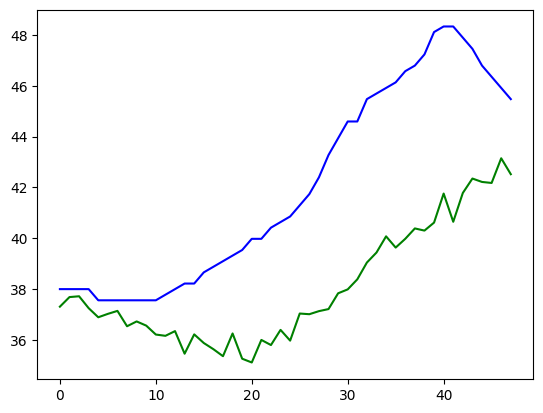

In [ ]:
import matplotlib.pyplot as plt
neti = net.eval()
for i, (inputs, targets) in enumerate(test_data): 
    if i == 50: 
        break
    else: 
        output = neti(inputs)

plt.plot(output[1,:].tolist(), 'g')
plt.plot(targets[1,0,:].tolist(), 'b')

#### Dlinear

Random seed set as 42
Dlinear activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 18.58944076385498
Current (running) training loss at iteration 10000 : 15.547907088088989
Current (running) training loss at iteration 15000 : 13.119651695251465
Current (running) training loss at iteration 20000 : 11.746393889236451
Current (running) training loss at iteration 25000 : 10.811766997680664
Current (running) training loss at iteration 30000 : 10.833990987968445

Epoch 0: 

Train metrics: -------
Running (training) loss is 10.68548210215973.
Training MAE is 0.9053219849912467.
Training MSE is 10.752281820047125.
Training MAPE is 70418319.82729883.

Val metrics: -------
Running (validation) loss is 54.7116946087525.
Validation MAE is 2.1966348209443285.
Validation MSE is 54.78024066239084.
Validation MAPE is 0.06648468446848159.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 8.481261365509033
Current (running) training loss at ite

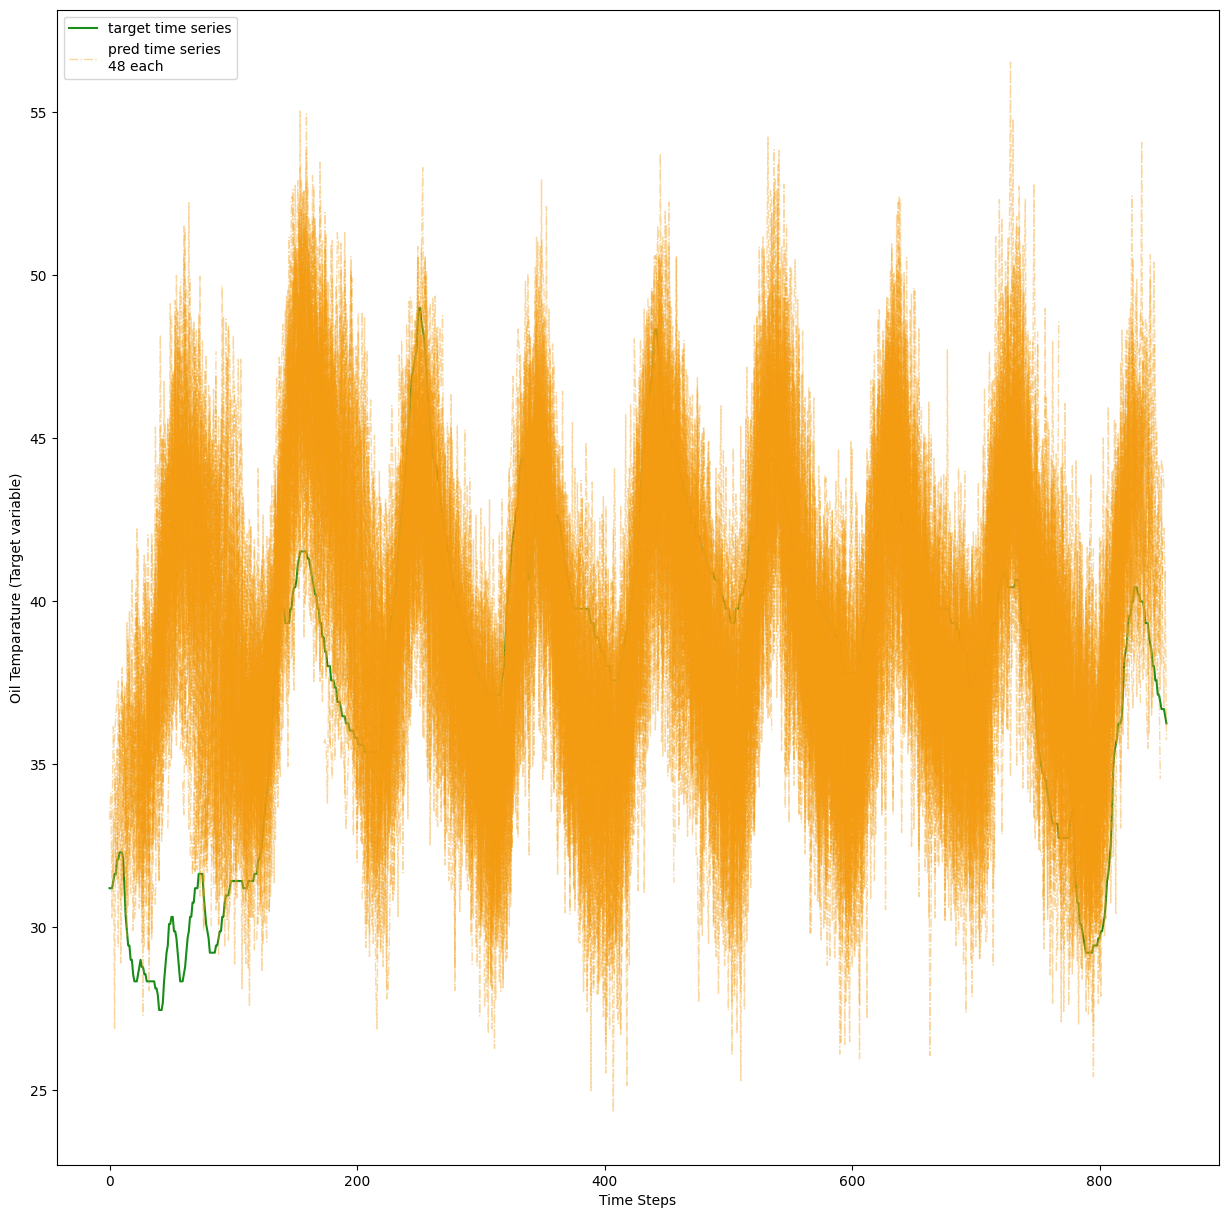

In [ ]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'dlinear'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)

#### RLMP

Random seed set as 42
RMLP activated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 34.15103763961792
Current (running) training loss at iteration 10000 : 26.215125174427033
Current (running) training loss at iteration 15000 : 20.059809621302286
Current (running) training loss at iteration 20000 : 16.20290729264021
Current (running) training loss at iteration 25000 : 14.707261218910217
Current (running) training loss at iteration 30000 : 13.692369370698929

Epoch 0: 

Train metrics: -------
Running (training) loss is 12.882676473059057.
Training MAE is 0.9050180617034954.
Training MSE is 12.951467582087405.
Training MAPE is 60587659.24700862.

Val metrics: -------
Running (validation) loss is 7.078883362597772.
Validation MAE is 0.7104712083536874.
Validation MSE is 7.143642597744215.
Validation MAPE is 0.021140445516283024.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 3.695407676792145
Current (running) training loss at i

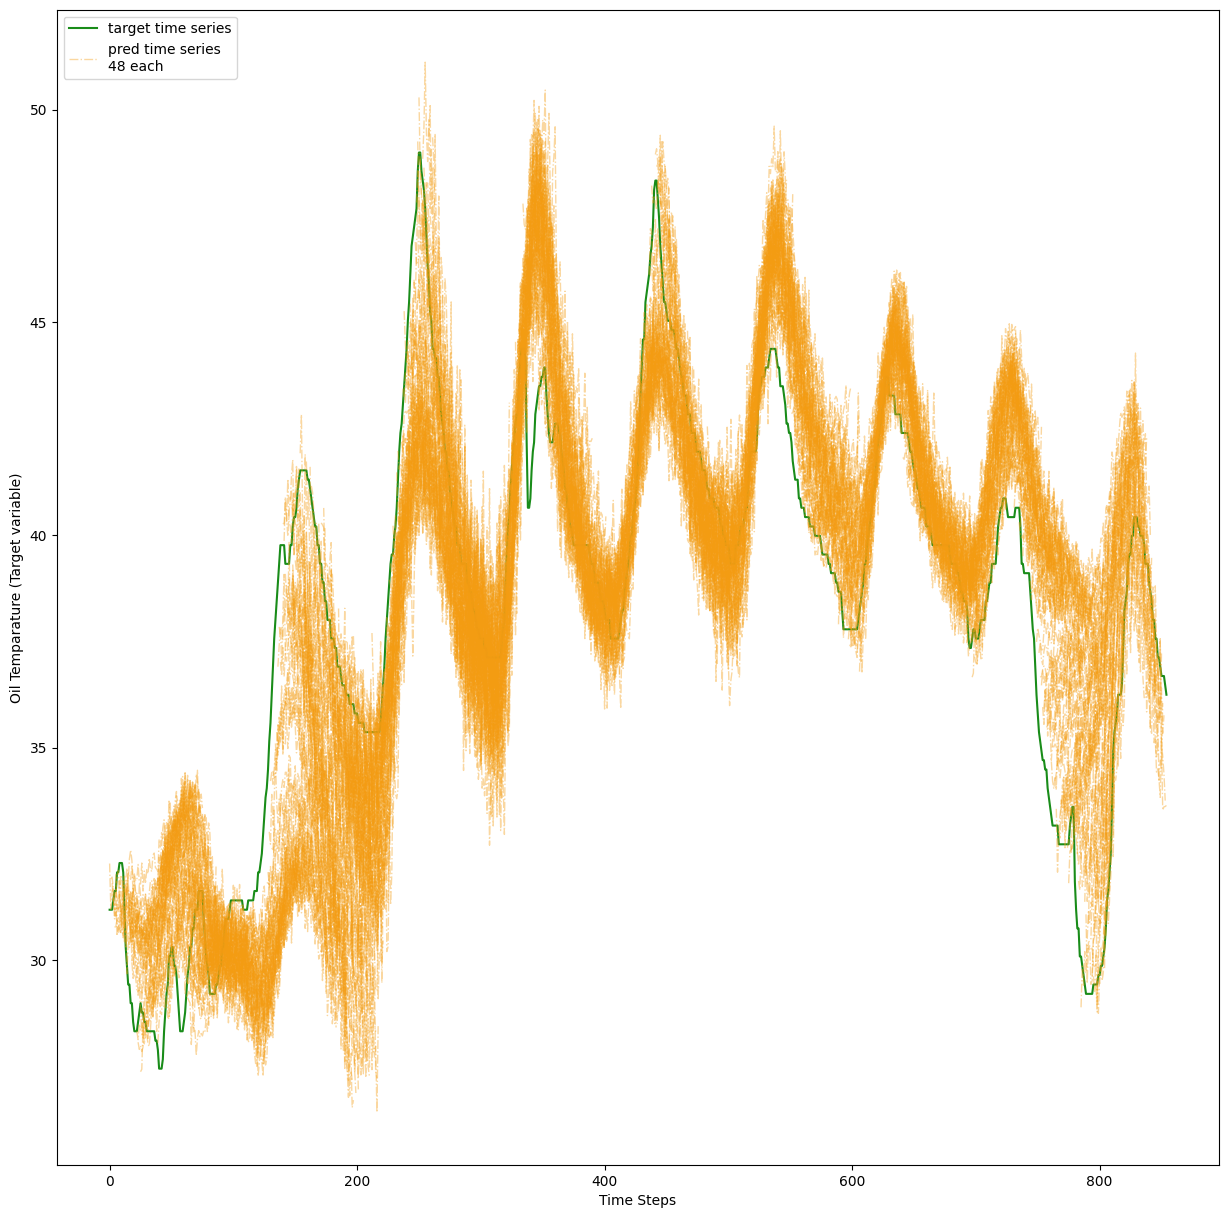

In [ ]:
net, res = train(
            epochs = epochs, 
            n_continous_features=7, 
            n_categorial_features=5,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = val_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            get_residuals = True, 
            model = 'rmlp'
            )

test_data = DataLoader(TimeSeriesDataset(test_df,future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)
evaluate_on_test_data(test_data = test_data, neural_net = net)